In [28]:
PROVIDE_OWN_INPUT = False

In [29]:
from google.colab import files
files.upload()

Saving dataset6.csv to dataset6.csv


{'dataset6.csv': b'Company Name,Net Sales,Cons OCF,Cons PAT,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,1344,-51.32,-976.27,-0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,40.47,-0.11,-2.27,18.69,0.36\r\n3M India Ltd.,1840,177.37,108.34,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,13.50,0.11,0.03,39.39,3.72\r\nABB India Ltd.,104,479.00,228.51,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.96,0.04,-0.08,53.97,2.54\r\nAbbott India Ltd.,7733,214.78,228.96,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,19.38,#N/A,#N/A,18.28,3.07\r\nAccelya Solutions India Ltd.,2289,66.28,67.40,0.98,39.81,22.26,79.73,60.01,95.47,0.98,0.00,21.90,0.13,0.21,8.30,3.82\r\nAegis Logistics Ltd.,303,122.34,103.41,1.18,4.74,2.87,24.22,28.89,26.32,4.30,0.51,26.58,0.67,0.19,10.26,0.24\r\nAGC Networks Ltd.,3916,27.96,14.77,1.89,3.23,1.66,0.00,18.39,15.58,0.96,1.44,19.03,#N/A,#N/A,0

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
data = pd.read_csv('dataset6.csv')

In [32]:
data.head(20)

,Company Name,Net Sales,Cons OCF,Cons PAT,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,1344,-51.32,-976.27,-0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,40.47,-0.11,-2.27,18.69,0.36
1,3M India Ltd.,1840,177.37,108.34,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,13.50,0.11,0.03,39.39,3.72
2,ABB India Ltd.,104,479.00,228.51,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.96,0.04,-0.08,53.97,2.54
3,Abbott India Ltd.,7733,214.78,228.96,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,19.38,NaN,NaN,18.28,3.07
4,Accelya Solutions India Ltd.,2289,66.28,67.40,0.98,39.81,22.26,79.73,60.01,95.47,0.98,0.00,21.90,0.13,0.21,8.30,3.82
5,Aegis Logistics Ltd.,303,122.34,103.41,1.18,4.74,2.87,24.22,28.89,26.32,4.30,0.51,26.58,0.67,0.19,10.26,0.24
6,AGC Networks Ltd.,3916,27.96,14.77,1.89,3.23,1.66,0.00,18.39,15.58,0.96,1.44,19.03,NaN,NaN,0.05,0.27
7,Agro Tech Foods Ltd.,891,40.94,36.92,1.11,8.01,4.86,13.20,12.38,14.48,1.90,0.08,22.09,0.03,0.08,20.80,1.89
8,Akzo Nobel India Ltd.,760,155.40,186.30,0.83,11.66,6.66,50.13,21.11,31.33,1.46,0.00,11.48,0.22,0.03,27.77,6.29
9,Allsec Technologies Ltd.,2527,-5.98,-14.06,-0.43,0.21,-9.32,0.00,-19.94,-12.43,1.42,0.23,19.18,0.02,0.07,0.55,0.23


In [33]:
test = data.iloc[:,:]

In [34]:
data = data.replace( ' -   ', np.nan)

In [35]:
data.dtypes

Company Name                     object
Net Sales                         int64
Cons OCF                        float64
Cons PAT                        float64
OCF/PAT                         float64
PBIDTM (%)                      float64
PATM (%)                        float64
FR_Dividend Pay Out Ratio(%)    float64
ROE (%)                         float64
ROCE (%)                        float64
Asset Turnover(x)               float64
Total Debt/Equity(x)            float64
Free Float                      float64
5 YR Sales CAGR                 float64
5 YR PAT CAGR                   float64
Ev/EBITDA                       float64
M/Sales                         float64
dtype: object

In [36]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [37]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [38]:
data.fillna(0, inplace=True)

In [39]:
len(data.columns)

17

# **Ev/EBITDA Prediction**

In [40]:
data1 = data.iloc[:,:-1 ]

In [41]:
data1.head()


,Company Name,Net Sales,Cons OCF,Cons PAT,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,Ev/EBITDA
0,3I Infotech Ltd.,1344.0,-51.32,-976.27,-0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,40.47,-0.11,-2.27,18.69
1,3M India Ltd.,1840.0,177.37,108.34,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,13.50,0.11,0.03,39.39
2,ABB India Ltd.,104.0,479.00,228.51,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.96,0.04,-0.08,53.97
3,Abbott India Ltd.,7733.0,214.78,228.96,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,19.38,0.00,0.00,18.28
4,Accelya Solutions India Ltd.,2289.0,66.28,67.40,0.98,39.81,22.26,79.73,60.01,95.47,0.98,0.00,21.90,0.13,0.21,8.30


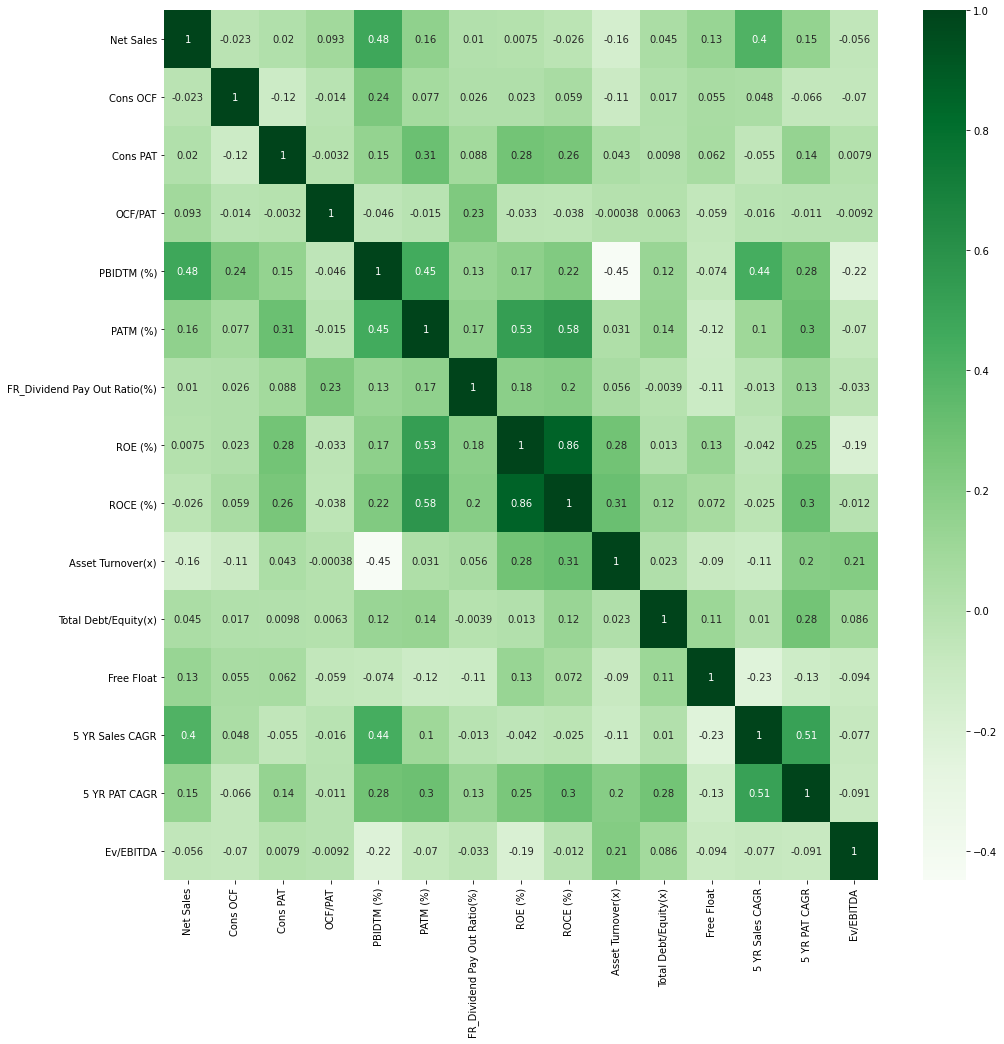

In [42]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

## Selecting most important features:

In [43]:
cor_target = abs(cor["Ev/EBITDA"])
cor_target.sort_values(ascending=False)[:6]
#print(list(cor_target.index))

Ev/EBITDA            1.000000
PBIDTM (%)           0.222203
Asset Turnover(x)    0.209427
ROE (%)              0.192377
Free Float           0.094114
5 YR PAT CAGR        0.090991
Name: Ev/EBITDA, dtype: float64

In [44]:
X,y = data1[['PBIDTM (%)', 'Asset Turnover(x)', 'ROE (%)', '5 YR PAT CAGR',
       'Free Float']], data1['Ev/EBITDA']

In [45]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [46]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [47]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.10f}'.format(i,r, mean_squared_error(y_test.values, p),))

 0 LassoCV                 891.9573969238
 1 XGBRegressor            1101.0874462835
 2 RidgeCV                 890.1189844915
 3 BayesianRidge           925.8014552339
 4 ARDRegression           908.3913531765
 5 ElasticNetCV            895.3852089947
 6 LassoLarsCV             906.5962992818
 7 SVR                     1006.9989980113


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [48]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.09749
 1 XGBRegressor            -0.11411
 2 RidgeCV                 0.09935
 3 BayesianRidge           0.06325
 4 ARDRegression           0.08086
 5 ElasticNetCV            0.09402
 6 LassoLarsCV             0.08268
 7 SVR                     -0.01891


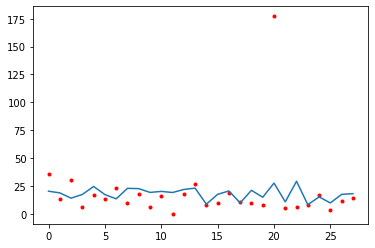

In [50]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[2])

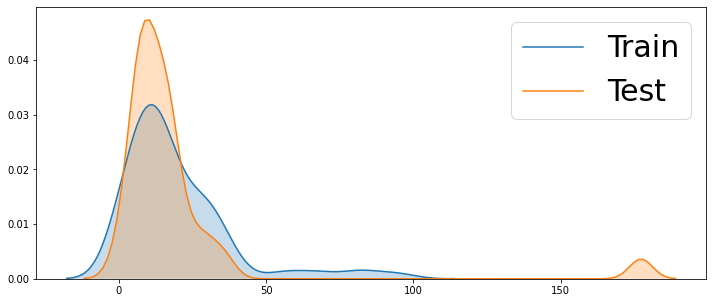

In [51]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

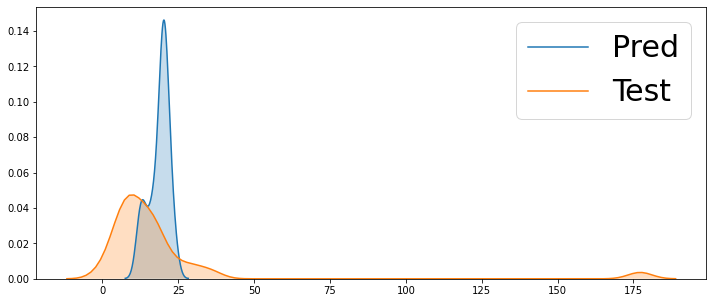

In [52]:
plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

# **M/Sales Prediction**

In [53]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [54]:
data2.head()

,Company Name,Net Sales,Cons OCF,Cons PAT,OCF/PAT,PBIDTM (%),PATM (%),FR_Dividend Pay Out Ratio(%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Free Float,5 YR Sales CAGR,5 YR PAT CAGR,M/Sales
0,3I Infotech Ltd.,1344.0,-51.32,-976.27,-0.05,13.18,-72.62,0.00,0.00,-27.87,0.43,-4.74,40.47,-0.11,-2.27,0.36
1,3M India Ltd.,1840.0,177.37,108.34,1.64,11.32,5.62,0.00,14.38,20.53,1.34,0.02,13.50,0.11,0.03,3.72
2,ABB India Ltd.,104.0,479.00,228.51,2.10,7.23,2.80,34.31,8.33,14.73,0.85,0.13,14.96,0.04,-0.08,2.54
3,Abbott India Ltd.,7733.0,214.78,228.96,0.94,15.53,9.88,28.77,26.54,39.98,1.13,0.00,19.38,0.00,0.00,3.07
4,Accelya Solutions India Ltd.,2289.0,66.28,67.40,0.98,39.81,22.26,79.73,60.01,95.47,0.98,0.00,21.90,0.13,0.21,3.82


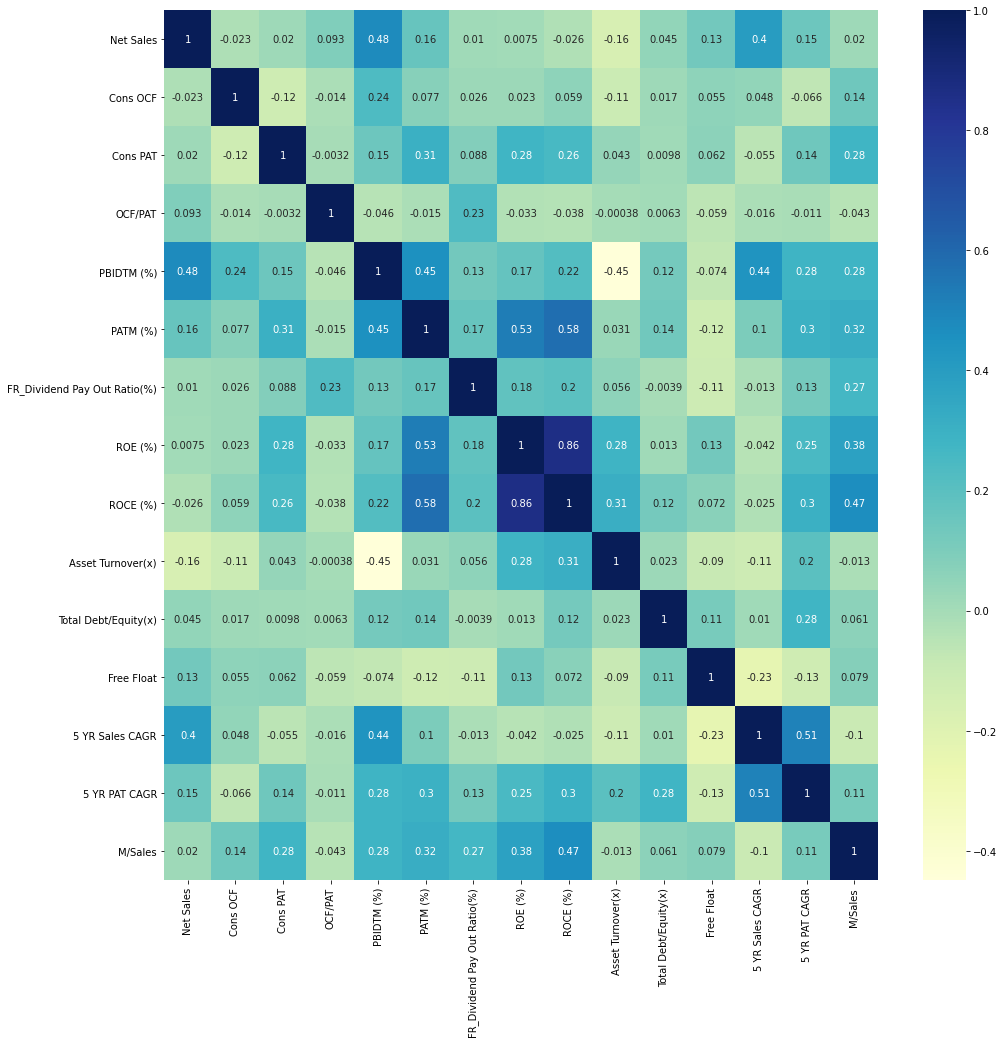

In [55]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [56]:
cor_target = abs(cor["M/Sales"])
cor_target.sort_values(ascending=False)[:6]

M/Sales       1.000000
ROCE (%)      0.466173
ROE (%)       0.382587
PATM (%)      0.319619
PBIDTM (%)    0.281408
Cons PAT      0.279047
Name: M/Sales, dtype: float64

In [57]:
X,y = data2[['PATM (%)', 'PBIDTM (%)', 'ROE (%)', 'ROCE (%)',
       'Cons PAT']], data2['M/Sales']

In [58]:
from sklearn.model_selection import train_test_split
if PROVIDE_OWN_INPUT:
    X_test =  pd.read_csv('test_data.csv')
    X_train,y_train = X,y
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [59]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1],cv=5),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=10),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR',]
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

### Mean Squared Error
> Lower the value of error, better the performance

In [60]:
from sklearn.metrics import mean_squared_error
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, round(mean_squared_error(y_test.values, p)**0.5,5),))

 0 LassoCV                 2.00300
 1 XGBRegressor            2.14269
 2 RidgeCV                 1.99608
 3 BayesianRidge           2.01736
 4 ARDRegression           1.99217
 5 ElasticNetCV            2.00299
 6 LassoLarsCV             2.02146
 7 SVR                     2.24978


### R2 Score
> Higher the score, better the model. A perfect model willl have the highest value(i.e 1).

In [61]:
from sklearn.metrics import r2_score
for i,r,p in zip(range(len(reg_name)),reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:2d} {:20s}    {:.5f}'.format(i,r, r2_score(y_test.values, p)))

 0 LassoCV                 0.18591
 1 XGBRegressor            0.06840
 2 RidgeCV                 0.19153
 3 BayesianRidge           0.17420
 4 ARDRegression           0.19469
 5 ElasticNetCV            0.18592
 6 LassoLarsCV             0.17084
 7 SVR                     -0.02705


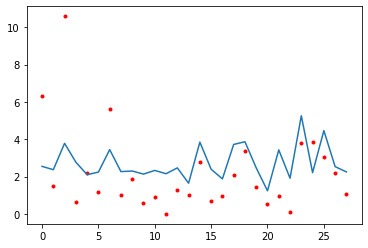

In [63]:
if PROVIDE_OWN_INPUT:
    plt.plot(range(y_train.shape[0]),y_train,'.r')
else:
    plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[3]))], pred_list[2])

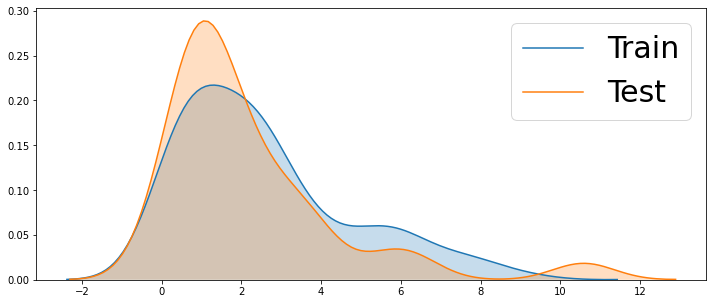

In [64]:
plt.subplots(figsize=(12,5))
sns.kdeplot(y_train, shade=True, label='Train')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})

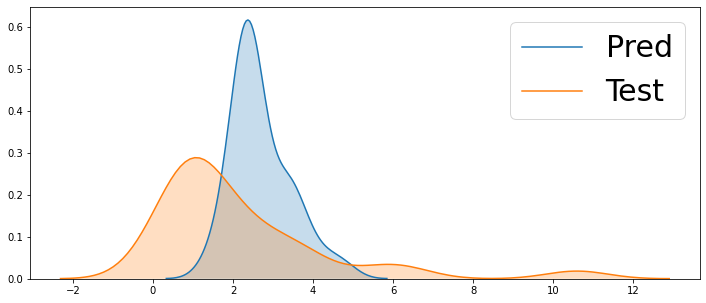

In [65]:

plt.subplots(figsize=(12,5))
sns.kdeplot(pred_list[3], shade=True, label='Pred')
sns.kdeplot(y_test, shade = True, label= 'Test')
plt.legend( prop={'size': 30})